# SQL Murder Mystery

**There's been a Murder in SQL City!**

## Table of contents

- [1. Introduction - A crime has taken place](#bullet-1)
- [2. Initial setup - Getting our detective tools ready](#bullet-2)
- [3. Data analysis - Searching for clues](#bullet-3)
    - [3.a) What crimes occured on the given date and place?](#bullet-3a)
    - [3.b) Locating the witnesses](#bullet-3b)
    - [3.c) Interviewing the witnesses](#bullet-3c)
    - [3.d) Getting close to the murderer](#bullet-3d)
    - [3.e) Interviewing our suspect](#bullet-3e)
    - [3.f) Looking for the woman behind the crime](#bullet-3f)
- [4. Conclusion - Turn the suspect in!](#bullet-4)

## 1. Introduction - A crime has taken place<a class="anchor" id="bullet-1"></a>

There's been a Murder in SQL City! The SQL Murder Mystery is designed to be both a self-directed lesson to learn SQL concepts and commands and a fun game for experienced SQL users to solve an intriguing crime.

A crime has taken place and the detective needs our help. The detective gave us the crime scene report, but we somehow lost it. We vaguely remember that the crime was a **murder** that occurred sometime on **Jan 15, 2018** and that it took place in **SQL City**. We need to start by retrieving the corresponding crime scene report from the police department’s database.

## 2. Initial setup - Getting our detective tools ready<a class="anchor" id="bullet-2"></a>

Connect our Jupyter Notebook to the database file:

In [1]:
%%capture
%load_ext sql
%sql sqlite:///sql-murder-mystery.db

Getting information on the tables and views in the database:

In [2]:
%%sql

SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");

 * sqlite:///sql-murder-mystery.db
Done.


name,type
crime_scene_report,table
drivers_license,table
person,table
facebook_event_checkin,table
interview,table
get_fit_now_member,table
get_fit_now_check_in,table
income,table
solution,table


**Inspection of crime_scene_report table**

In [3]:
%%sql

SELECT *
FROM crime_scene_report
LIMIT 5;

 * sqlite:///sql-murder-mystery.db
Done.


date,type,description,city
20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
20180115,murder,Life? Dont talk to me about life.,Albany
20180115,murder,"Mama, I killed a man, put a gun against his head...",Reno
20180215,murder,REDACTED REDACTED REDACTED,SQL City
20180215,murder,Someone killed the guard! He took an arrow to the knee!,SQL City


**Inspection of drivers_license table**

In [4]:
%%sql

SELECT *
FROM drivers_license
LIMIT 5;

 * sqlite:///sql-murder-mystery.db
Done.


id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
100280,72,57,brown,red,male,P24L4U,Acura,MDX
100460,63,72,brown,brown,female,XF02T6,Cadillac,SRX
101029,62,74,green,green,female,VKY5KR,Scion,xB
101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
101255,18,79,blue,grey,female,5162Z1,Lexus,GS


**Inspection of person table**

In [5]:
%%sql

SELECT *
FROM person
LIMIT 5;

 * sqlite:///sql-murder-mystery.db
Done.


id,name,license_id,address_number,address_street_name,ssn
10000,Christoper Peteuil,993845,624,Bankhall Ave,747714076
10007,Kourtney Calderwood,861794,2791,Gustavus Blvd,477972044
10010,Muoi Cary,385336,741,Northwestern Dr,828638512
10016,Era Moselle,431897,1987,Wood Glade St,614621061
10025,Trena Hornby,550890,276,Daws Hill Way,223877684


**Inspection of facebook_event_checkin table**

In [6]:
%%sql

SELECT *
FROM facebook_event_checkin
LIMIT 5;

 * sqlite:///sql-murder-mystery.db
Done.


person_id,event_id,event_name,date
28508,5880,Nudists are people who wear one-button suits.,20170913
63713,3865,but that's because it's the best book on anything for the layman.,20171009
63713,3999,"If Murphy's Law can go wrong, it will.",20170502
63713,6436,Old programmers never die. They just branch to a new address.,20170926
82998,4470,Help a swallow land at Capistrano.,20171022


**Inspection of interview table**

In [7]:
%%sql

SELECT *
FROM interview
LIMIT 5;

 * sqlite:///sql-murder-mystery.db
Done.


person_id,transcript
28508,‘I deny it!’ said the March Hare.
63713,
86208,"way, and the whole party swam to the shore."
35267,"lessons in here? Why, there’s hardly room for YOU, and no room at all"
33856,


**Inspection of get_fit_now_member table**

In [8]:
%%sql

SELECT *
FROM get_fit_now_member
LIMIT 5;

 * sqlite:///sql-murder-mystery.db
Done.


id,person_id,name,membership_start_date,membership_status
NL318,65076,Everette Koepke,20170926,gold
AOE21,39426,Noe Locascio,20171005,regular
2PN28,63823,Jeromy Heitschmidt,20180215,silver
0YJ24,80651,Waneta Wellard,20171206,gold
3A08L,32858,Mei Bianchin,20170401,silver


**Inspection of get_fit_now_check_in table**

In [9]:
%%sql

SELECT *
FROM get_fit_now_check_in
LIMIT 5;

 * sqlite:///sql-murder-mystery.db
Done.


membership_id,check_in_date,check_in_time,check_out_time
NL318,20180212,329,365
NL318,20170811,469,920
NL318,20180429,506,554
NL318,20180128,124,759
NL318,20171027,418,1019


**Inspection of income table**

In [10]:
%%sql

SELECT *
FROM income
LIMIT 5;

 * sqlite:///sql-murder-mystery.db
Done.


ssn,annual_income
100009868,52200
100169584,64500
100300433,74400
100355733,35900
100366269,73000


## 3. Data analysis - Searching for clues<a class="anchor" id="bullet-3"></a>

### 3.a) What crimes occured on the given date and place? <a class="anchor" id="bullet-3a"></a>

We know that our crime was a murder that occurred on Jan 15, 2018 and that it took place in SQL City. Therefore, let's look on the police reports for crimes that match ours:

In [11]:
%%sql

SELECT *
FROM crime_scene_report
WHERE (date = 20180115) AND (type = "murder") AND (city = "SQL City")

 * sqlite:///sql-murder-mystery.db
Done.


date,type,description,city
20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City


Aha! So only one crime occured that day. Now we know where to start searching for witnesses in order to ask them what they saw...

### 3.b) Locating the witnesses <a class="anchor" id="bullet-3b"></a>

We have found that we can rely on two witnesses. The first witness lives at the last house on "Northwestern Dr", while the second witness -Annabel- lives "Franklin Ave".

In [12]:
%%sql

WITH last_house_on_Northwestern_Dr AS
(
    SELECT MAX(address_number)
    FROM person
    WHERE address_street_name = "Northwestern Dr"
)

SELECT *
FROM person
WHERE ((name LIKE "Annabel%") AND (address_street_name = "Franklin Ave"))
    OR ((address_street_name = "Northwestern Dr") AND (address_number = (SELECT * FROM last_house_on_Northwestern_Dr)))

 * sqlite:///sql-murder-mystery.db
Done.


id,name,license_id,address_number,address_street_name,ssn
14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
16371,Annabel Miller,490173,103,Franklin Ave,318771143


Now that we've found the Id's of our witnesses, it's time to interview them...

### 3.c) Interviewing the witnesses <a class="anchor" id="bullet-3c"></a>

The Id's of our witnesses are 14887 -Morty Schapiro- and 16371 -Annabel Miller-. Let's see what they said on the interview:

In [13]:
%%sql

SELECT *
FROM interview
WHERE (person_id = 14887) OR (person_id = 16371)

 * sqlite:///sql-murder-mystery.db
Done.


person_id,transcript
14887,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership number on the bag started with ""48Z"". Only gold members have those bags. The man got into a car with a plate that included ""H42W""."
16371,"I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."


We are getting closer to the murderer! Get prepared, we partially know the gym's membership number of the bag's owner, plate number of the car he used and one of the days you went to the gym!

### 3.d) Getting close to the murderer <a class="anchor" id="bullet-3d"></a>

To start approaching the murderer, we'll cross-search the data that the witnesses gave us:
- "Get Fit Now Gym" membership of the bag's owner number starts with "48Z"
- The bag's owner is a gold member of "Get Fit Now Gym"
- The plate of the car used to run away contains "H42W"
- The murderer went to the gym on January 9th

In [14]:
%%sql

WITH matching_licenses_ids AS
(
    SELECT id
    FROM drivers_license
    WHERE plate_number LIKE "%H42W%"
),

matching_gym_members_ids AS
(
    WITH memberships_check_ins_20180109 AS
    (
        SELECT membership_id
        FROM get_fit_now_check_in
        WHERE check_in_date = 20180109
    )

    SELECT person_id
    FROM get_fit_now_member
    WHERE (id LIKE "48Z%")
        AND (membership_status = "gold")
        AND (id IN (SELECT * FROM memberships_check_ins_20180109))
)

SELECT *
FROM person
WHERE (license_id IN (SELECT * FROM matching_licenses_ids))
    AND (id in (SELECT * FROM matching_gym_members_ids))

 * sqlite:///sql-murder-mystery.db
Done.


id,name,license_id,address_number,address_street_name,ssn
67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


So, we know that <ins>Jeremy Bowers matches all the details that were given by our two witnesses</ins>.

### 3.e) Interviewing our suspect <a class="anchor" id="bullet-3e"></a>

We've reduced our suspects lists to one person: Jeremy Bowers. Let's interview the guy:

In [15]:
%%sql

SELECT *
FROM interview
WHERE person_id = 67318

 * sqlite:///sql-murder-mystery.db
Done.


person_id,transcript
67318,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" (65"") or 5'7"" (67""). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017."


The suspect has confessed the crime! But apparently, he was hired by another person: a rich woman around 5'5" (65") or 5'7" (67") that owns a Tesla Model S and that attended the SQL Symphony Concert 3 times in December 2017.

### 3.f) Looking for the woman behind the crime <a class="anchor" id="bullet-3f"></a>

The clues about the woman behind this crime are not unique identifiers, but we might have enough of them to cross the data and get close to the evil mind!

As "being rich" is not a very specific definition, we'll start by using the remaining information to list our suspects behind the crime:

In [16]:
%%sql

WITH tesla_model_s_owners_between_65_and_67 AS
(
    SELECT id
    FROM drivers_license
    WHERE (car_make = "Tesla") AND (car_model = "Model S")
        AND (gender = "female")
        AND ((height >= 65) AND (height <=67))
),

people_matching_with_concert AS
(
    WITH times_attended_to_concert_in_december_2017 AS
    (
        SELECT person_id, COUNT(*) times_attended
        FROM facebook_event_checkin
        WHERE event_name = "SQL Symphony Concert"
            AND ((date >= 20171201) AND (date <= 20171231))
        GROUP BY person_id
    )

SELECT person_id
FROM times_attended_to_concert_in_december_2017
WHERE times_attended = 3
)

SELECT *
FROM person
WHERE (license_id IN (SELECT * FROM tesla_model_s_owners_between_65_and_67))
    AND (id IN (SELECT * FROM people_matching_with_concert))

 * sqlite:///sql-murder-mystery.db
Done.


id,name,license_id,address_number,address_street_name,ssn
99716,Miranda Priestly,202298,1883,Golden Ave,987756388


The list of suspects behind the crime has been reduced to one person!

Now, as we don't deny the value of any information, let's check whether Miranda Priestly is a rich person:

In [17]:
%%sql

SELECT annual_income Miranda_Priestly_income,
    ROUND((SELECT AVG(annual_income) FROM income)) Average_income
FROM income
WHERE ssn = 987756388

 * sqlite:///sql-murder-mystery.db
Done.


Miranda_Priestly_income,Average_income
310000,53258.0


Indeed she is a rich person! Miranda Priestly's income is more than 5x higher than the average income!

## 4. Conclusion - Turn the suspect in! <a class="anchor" id="bullet-4"></a>

Now we're ready to capture our suspect, **Miranda Priestly**.

We'll head now to the police station and turn her in!

In [18]:
%%sql

INSERT INTO solution VALUES (1, 'Miranda Priestly');
        
        SELECT value FROM solution;

 * sqlite:///sql-murder-mystery.db
1 rows affected.
Done.


value
"Congrats, you found the brains behind the murder! Everyone in SQL City hails you as the greatest SQL detective of all time. Time to break out the champagne!"


**Another crime solved - You're welcome, SQL City!**

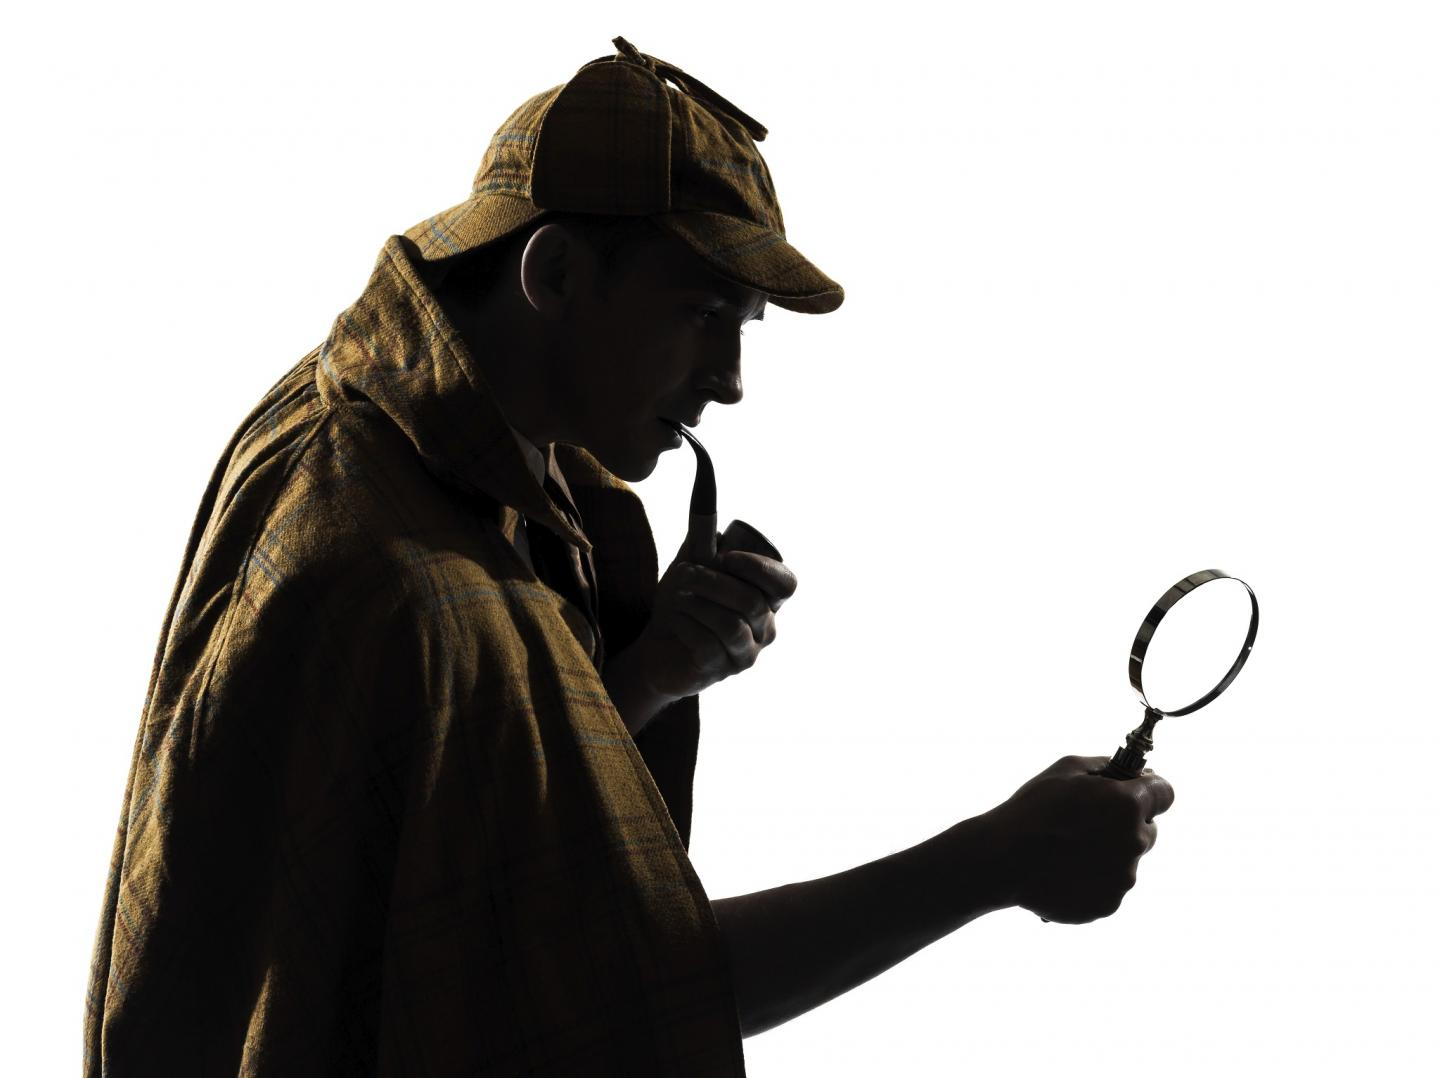